<font color='black'> 
# Computational Statistics for Data Analysis
</font>

# <div class="alert alert-error"><strong><center><small>"Statistics is the discipline of using data samples to support claims about populations."<small></center></strong> </div>

In this notebook, we will get familiar with Descriptive statistics that comprise  concepts, terms, measures and tools that help to describe, show and summarize the data in a meaningful way. When analysing data, such as the price of flats renting per year, it is possible to use both descriptive and inferential statistics in order to analyse the results and draw some conclusions. We will discuss basic concepts,  terms and procedures, like mean, median, variance, correlation, etc.,  to explore, describe and summarize the given set of data.

Statistics is based on 2 main concepts:

* A **population** is a collection of objects, items (“units”) about which information is sought.

* A **sample** is a part of the population that is observed.

<font color='black'>
# 1 Descriptive Statistics.
* 1.1 Getting data
* 1.2 Data preparation
* 1.3 Improving data as a pandas DataFrame
* 1.4 Data cleaning 
 <font\>

### "Are the men more likely to become high income professionals i.e. to receive income bigger than 50K?"

Some people believe it is true, but **without data analysis** to support it, this claim is a case of **anecdotal evidence**:

* There are a **small number of samples** (personal experience, friends, etc.).
* There is a **selection bias**: most *believers* are interested in this claim because their first babies were late.
* There is a **confirmation bias**: believers might be more likely to contribute data that confirm it.
* Sources are **innaccurate**: personal stories are subject to memory deformations. 


## 1.1 Getting Data

Let us consider a public database, called “Adult” dataset hosted on the UCI’s Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Adult), that contains approximately 32.000 observations about different financial parameters of US population.

### 1.2 Data preparation

One of the reasons we are using a general-purpose language such as Python rather than a stats language like R is that for many projects the *hard* part is preparing the data, not doing the analysis.

The most common steps are:

1. **Getting the data**. Data can be directly read from a file or it might be necessary to scrap the web.
2. **Parsing the data**.  Of course, this depends on what format it is in: plain text, fixed columns, CSV, XML, HTML, etc.
3. **Cleaning the data**.  Survey responses and other data files are almost always incomplete.  Sometimes there are multiple codes for things like, *not asked*, *did not know*, and *declined to answer*. And there are almost always errors. A simple strategy is to remove or ignore incomplete records.
4. **Building data structures**. Once you read the data, you usually want to store it in a data structure that lends itself to the analysis you want to do.

If the data fits into memory, building a data structure is usually the way to go.   If not, you could build a database, which is an out-of-memory data structure. Most databases provide a mapping from keys to values, so they are like dictionaries.

Let us read the dataset:

In [1]:
file = open('files/ch03/adult.data', 'r')

In [2]:
def chr_int(a):
    if a.isdigit():
        return int(a)
    else:
        return 0
                
data=[]
for line in file:
     data1=line.split(', ')
     if len(data1)==15:
        data.append([chr_int(data1[0]),data1[1],chr_int(data1[2]),data1[3],chr_int(data1[4]),data1[5],data1[6],\
            data1[7],data1[8],data1[9],chr_int(data1[10]),chr_int(data1[11]),chr_int(data1[12]),data1[13],\
            data1[14]])

In [3]:
print(data[1:2])

[[50, 'Self-emp-not-inc', 83311, 'Bachelors', 13, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 13, 'United-States', '<=50K\n']]


### 1.3 Importing data as a pandas DataFrame

In [4]:
%matplotlib inline
import pandas as pd

df = pd.DataFrame(data) #  Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes 

df.columns = ['age', 'type_employer', 'fnlwgt', 'education', 
                "education_num","marital", "occupation", "relationship", "race","sex",
                "capital_gain", "capital_loss", "hr_per_week","country","income"]
df.head()



,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K\n
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K\n
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K\n
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K\n


In [5]:
df.tail()


,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K\n
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K\n
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K\n
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K\n
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K\n


In [6]:
df.shape

(32561, 15)

Let's count the number of items per country:


In [7]:
counts = df.groupby('country').size()

print(counts) 
# also: df.outcome.value_counts()




country
?                               583
Cambodia                         19
Canada                          121
China                            75
Columbia                         59
Cuba                             95
Dominican-Republic               70
Ecuador                          28
El-Salvador                     106
England                          90
France                           29
Germany                         137
Greece                           29
Guatemala                        64
Haiti                            44
Holand-Netherlands                1
Honduras                         13
Hong                             20
Hungary                          13
India                           100
Iran                             43
Ireland                          24
Italy                            73
Jamaica                          81
Japan                            62
Laos                             18
Mexico                          643
Nicaragua           

In [8]:
counts = df.groupby('age').size() # grouping by age
print(counts) 

age
17    395
18    550
19    712
20    753
21    720
     ... 
85      3
86      1
87      1
88      3
90     43
Length: 73, dtype: int64


In [9]:
ml = df[(df.sex == 'Male')] # grouping by sex
ml.shape

(21790, 15)

In [10]:
ml1 = df[(df.sex == 'Male')&(df.income=='>50K\n')]
ml1.shape

(6662, 15)

Let's separate male from female according to the income. 

In [11]:
fm =df[(df.sex == 'Female')]
fm.shape

(10771, 15)

In [12]:
fm1 =df[(df.sex == 'Female')&(df.income=='>50K\n')]
fm1.shape

(1179, 15)

In [13]:
df1=df[(df.income=='>50K\n')]

print('The rate of people with high income is: ', int(len(df1)/float(len(df))*100), '%.') 
print('The rate of men with high income is: ', int(len(ml1)/float(len(ml))*100), '%.') 
print('The rate of women with high income is: ', int(len(fm1)/float(len(fm))*100), '%.') 

The rate of people with high income is:  24 %.
The rate of men with high income is:  30 %.
The rate of women with high income is:  10 %.


### 1.4 Data Cleaning

The most common steps are:

+ **Sample the data**. If the amount of raw data is huge, processing all of them may require an extensive amount of processing power which may not be practical.  In this case, it is quite common to sample the input data to reduce the size of data that need to be processed.

+ **Impute missing data**. It is quite common that some of the input records are incomplete in the sense that certain fields are missing or have input error.  In a typical tabular data format, we need to validate each record contains the same number of fields and each field contains the data type we expect. In case the record has some fields missing, we have the following choices: 
<small>
* (a) Discard the whole record if it is incomplete; 
* (b) Infer the missing value based on the data from other records.  A common approach is to fill the missing data with the average, or the median.
<small>

+ **Normalize numeric value**. Normalize data is about transforming numeric data into a uniform range.

+ **Reduce dimensionality**. High dimensionality can be a problem for some machine learning methods.  There are two ways to reduce the number of input features.  One is about $removing$ $irrelevant$ input variables, another one is about $removing$ $redundant$ input variables.
+ **Add derived features**. In some cases, we may need to compute additional attributes from existing attributes (f.e. converting a geo-location to a zip code, or converting the age to an age group).
+ **Discretize numeric value into categories**. Discretize data is about cutting a continuous value into ranges and assigning the numeric with the corresponding bucket of the range it falls on.  For numeric attribute, a common way to generalize it is to discretize it into ranges, which can be either constant width (variable height/frequency) or variable width (constant height).
+ **Binarize categorical attributes**. Certain machine learning models only take binary input (or numeric input).  In this case, we need to convert categorical attribute into multiple binary attributes, while each binary attribute corresponds to a particular value of the category. 

+ **Select, combine, aggregate data**. Designing the form of training data is the most important part of the whole predictive modeling exercise because the accuracy largely depends on whether the input features are structured in an appropriate form that provide strong signals to the learning algorithm. Rather than using the raw data as it is, it is quite common that multiple pieces of raw data need to be combined together, or aggregating multiple raw data records along some dimensions.

## 2 Exploratory Data Analysis.

### 2.1 Summarizing the data: 
#### 2.1.1 Sample Mean 

If you have a sample of $n$ values, $x_i$, the **sample mean** is the sum of the values divided by the number of values:

$$ \mu = \frac{1}{n} \sum_i x_i$$

The **mean** is the most basic and important summary statistic. It describes the central tendency of a sample. 

There is a small difference!

In [14]:
print('The average age of men is: ', ml['age'].mean(), '.') 
print('The average age of women is: ', fm['age'].mean(), '.')

The average age of men is:  39.43354749885268 .
The average age of women is:  36.85823043357163 .


This difference in sample means can be considered a first evidence of our hypothesis!


**Comment: ** *Later, we will work with both concepts: the population mean and the sample mean. Do not confuse them! Remember, the first one is the mean of samples taken from the population and the second one is the mean of the whole population.*

In [15]:
print('The average age of high-income men is: ', ml1['age'].mean(), '.') 
print('The average age of high-income women is: ', fm1['age'].mean(), '.')

The average age of high-income men is:  44.62578805163614 .
The average age of high-income women is:  42.125530110262936 .


#### 2.1.2 Sample Variance

Usually, mean is not a sufficient descriptor of the data, we can do a little better with two numbers: mean and **variance**:

$$ \sigma^2 = \frac{1}{n} \sum_i (x_i - \mu)^2 $$

**Variance** $\sigma^2$ describes the *spread* of data. The term $(x_i - \mu)$ is called the *deviation from the mean*, so variance is the mean squared deviation.

The square root of variance, $\sigma$, is called the **standard deviation**. We define standard deviation because variance is hard to interpret (in the case the units are grams, the variance is in grams squared). Let's get the basic statistics for our example data:


In [16]:
ml_mu = ml['age'].mean()
fm_mu = fm['age'].mean()
ml_var = ml['age'].var()
fm_var = fm['age'].var()
ml_std = ml['age'].std()
fm_std = fm['age'].std()
print('Statistics of age for men: mu:', ml_mu, 'var:', ml_var, 'std:', ml_std)
print('Statistics of age for women: mu:', fm_mu, 'var:', fm_var, 'std:', fm_std)

Statistics of age for men: mu: 39.43354749885268 var: 178.77375174529985 std: 13.370630192526448
Statistics of age for women: mu: 36.85823043357163 var: 196.3837063948063 std: 14.013697099438332


In [17]:
ml_mu_hr = ml['hr_per_week'].mean()
fm_mu_hr = fm['hr_per_week'].mean()
ml_var_hr = ml['hr_per_week'].var()
fm_var_hr = fm['hr_per_week'].var()
ml_std_hr = ml['hr_per_week'].std()
fm_std_hr = fm['hr_per_week'].std()
print('Statistics of hours per week for men: mu:', ml_mu_hr, 'var:', ml_var_hr, 'std:', ml_std_hr)
print('Statistics  of hours per week for women: mu:', fm_mu_hr, 'var:', fm_var_hr, 'std:', fm_std_hr)

Statistics of hours per week for men: mu: 42.42808627810923 var: 146.88846717140746 std: 12.11975524387384
Statistics  of hours per week for women: mu: 36.410361154953115 var: 139.50679700047422 std: 11.811299547487323


#### 2.1.3 Sample Median

The statistical median is an order statistic that gives the *middle* value of a sample. It is a value more robust to ouliers.

In [18]:
ml_median= ml['age'].median()
fm_median= fm['age'].median()
print("Median age per men and women: ", ml_median, fm_median)

ml_median_age= ml1['age'].median()
fm_median_age= fm1['age'].median()
print("Median age per men and women with high-income: ", ml_median_age, fm_median_age)


Median age per men and women:  38.0 35.0
Median age per men and women with high-income:  44.0 41.0


In [19]:
ml_median_hr= ml['hr_per_week'].median()
fm_median_hr= fm['hr_per_week'].median()
print("Median hours per week per men and women: ", ml_median_hr, fm_median_hr)

Median hours per week per men and women:  40.0 40.0


#### 2.1.4 Summarizing the data: Quantiles & Percentiles

Order the sample $\{ x_i \}$, then find $x_p$ so that it divides the data into two parts where:

+ a fraction $p$ of the data values are less than or equal to $x_p$ and
+ the remaining fraction $(1 − p)$ are greater than $x_p$.

That value $x_p$ is the pth-quantile, or 100×pth percentile.

**5-number summary**: $x_{min}, Q_1, Q_2, Q_3, x_{max}$, where $Q_1$ is the 25×pth percentile,
$Q_2$ is the 50×pth percentile and $Q_3$ is the 75×pth percentile.

### 2.2 Histogram

The most common representation of a distribution is a **histogram**, which is a graph that shows the frequency of each value. Let us visualize the histogram for the age of the male and female populations in our example: 

/home/sitthichok/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:316: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


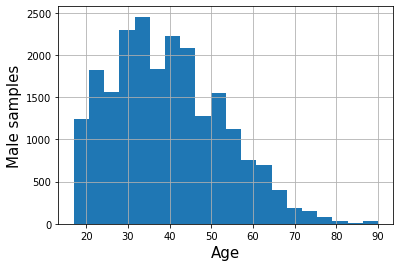

In [20]:
import matplotlib.pyplot as plt
ml_age=ml['age']
ml_age.hist(normed=0, histtype='stepfilled', bins=20)

plt.xlabel('Age',fontsize=15)
plt.ylabel('Male samples',fontsize=15)
plt.show()

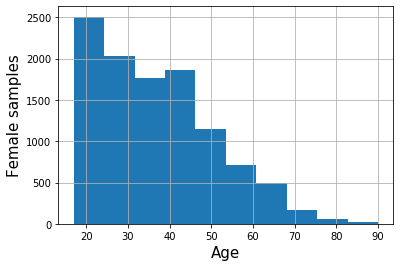

In [21]:
fm_age=fm['age']

fm_age.hist(normed=0, histtype='stepfilled', bins=10)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Female samples',fontsize=15)
plt.show()

Let's compare both populations: 

     |████████████████████████████████| 215kB 791kB/s eta 0:00:01


/home/sitthichok/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:316: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


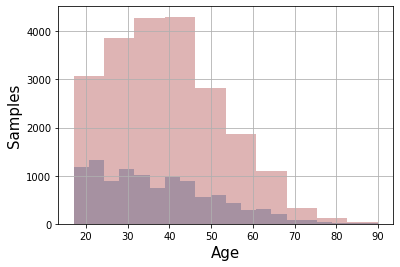

In [23]:
!pip install seaborn
import seaborn as sns
fm_age.hist(normed=0, histtype='stepfilled', alpha=.5, bins=20)   # default number of bins = 10
ml_age.hist(normed=0, histtype='stepfilled', alpha=.5, color=sns.desaturate("indianred", .75), bins=10)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Samples',fontsize=15)
plt.show()

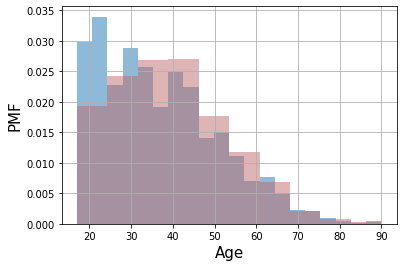

In [24]:
fm_age.hist(normed=1, histtype='stepfilled', alpha=.5, bins=20)   # default number of bins = 10
ml_age.hist(normed=1, histtype='stepfilled', alpha=.5, color=sns.desaturate("indianred", .75), bins=10)
plt.xlabel('Age',fontsize=15)
plt.ylabel('PMF',fontsize=15)
plt.show()

In [25]:
import scipy.stats as stats

## 2.3 Data Distributions

Summarizing can be dangerous: very different data can be described by the same statistics. It must be validated by inspecting the data.

We can look at the **data distribution**, which describes how often (frequency) each value appears.


We can normalize the frequencies of the histogram by dividing/normalizing by $n$, the number of samples. The normalized histogram is called **Probability Mass Function (PMF)**.

Let's visualize and compare the MPF of male and female age in our example:

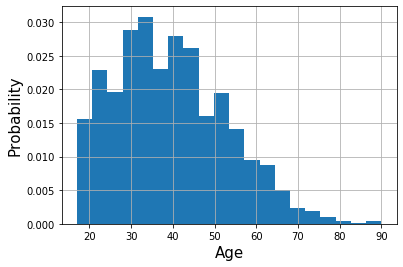

In [26]:
ml_age.hist(normed=1, histtype='stepfilled', bins=20)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Probability',fontsize=15)
plt.show()

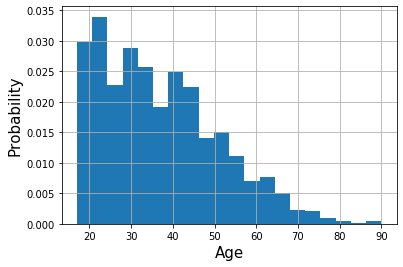

In [27]:
fm_age.hist(normed=1, histtype='stepfilled', bins=20)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Probability',fontsize=15)
plt.show()

The **cumulative distribution function (CDF)**, or just distribution function, describes the probability that a real-valued random variable X with a given probability distribution will be found to have a value less than or equal to x. For our example, the CDFs will be:

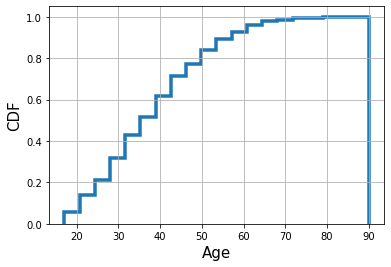

In [28]:
ml_age.hist(normed=1, histtype='step', cumulative=True, linewidth=3.5, bins=20)
plt.xlabel('Age',fontsize=15)
plt.ylabel('CDF',fontsize=15)
plt.show()

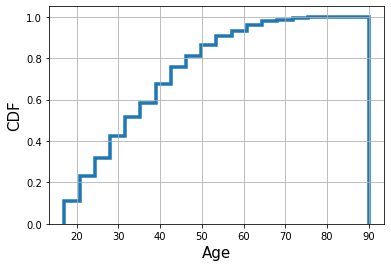

In [29]:
fm_age.hist(normed=1, histtype='step', cumulative=True, linewidth=3.5, bins=20)
plt.xlabel('Age',fontsize=15)
plt.ylabel('CDF',fontsize=15)
plt.show()

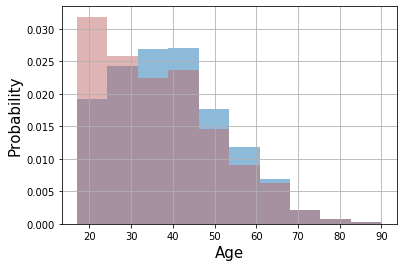

In [30]:
ml_age.hist(bins=10, normed=1, histtype='stepfilled', alpha=.5)   # default number of bins = 10
fm_age.hist(bins=10, normed=1, histtype='stepfilled', alpha=.5, color=sns.desaturate("indianred", .75))
plt.xlabel('Age',fontsize=15)
plt.ylabel('Probability',fontsize=15)
plt.show()

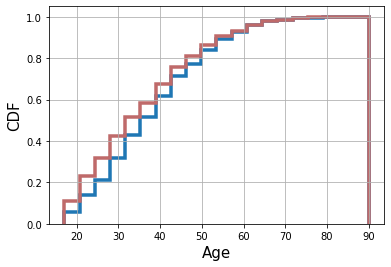

In [31]:
ml_age.hist(normed=1, histtype='step', cumulative=True,  linewidth=3.5, bins=20)
fm_age.hist(normed=1, histtype='step', cumulative=True,  linewidth=3.5, bins=20, color=sns.desaturate("indianred", .75))
plt.xlabel('Age',fontsize=15)
plt.ylabel('CDF',fontsize=15)
plt.show()

In [32]:
print("The mean sample difference is ", ml_age.mean() - fm_age.mean())

The mean sample difference is  2.5753170652810553


## 2.4 Outliers

**Ouliers** are data samples with a value that is far from the central tendency.

We can find outliers by:

+ Computing samples that are *far* from the median.
+ Computing samples whose value *exceeds the mean* by 2 or 3 standard deviations.

This expression will return a series of boolean values that you can then index the series by:

In [33]:
df['age'].median()

37.0

Let's see how many outliers we can detect in our example:

In [34]:
len(df[(df.income == '>50K\n') & (df['age'] < df['age'].median() - 15)])

5

In [35]:
len(df[(df.income == '>50K\n') & (df['age'] > df['age'].median() + 35)])

69

If we think that outliers correspond to errors, an option is to trim the data by discarting the highest and lowest values.

In [36]:
df2 = df.drop(df.index[(df.income=='>50K\n') & (df['age']>df['age'].median() + 35) & (df['age'] > df['age'].median() -15)])
df2.shape

(32492, 15)

In [37]:
ml1_age=ml1['age']
fm1_age=fm1['age']

ml2_age = ml1_age.drop(ml1_age.index[(ml1_age > df['age'].median() + 35) & (ml1_age > df['age'].median() - 15)])
fm2_age = fm1_age.drop(fm1_age.index[(fm1_age > df['age'].median() + 35) & (fm1_age > df['age'].median() - 15)])

In [38]:
mu2ml = ml2_age.mean()
std2ml = ml2_age.std()
md2ml = ml2_age.median()
# Computing the mean, std, median, min and max for the high-income male population
print("Men statistics: Mean:", mu2ml, "Std:", std2ml, "Median:", md2ml, "Min:", ml2_age.min(), "Max:", ml2_age.max())

Men statistics: Mean: 44.317982123920615 Std: 10.019749857171409 Median: 44.0 Min: 19 Max: 72


In [39]:
mu3ml = fm2_age.mean()
std3ml = fm2_age.std()
md3ml = fm2_age.median()
# Computing the mean, std, median, min and max for the high-income female population
print("Women statistics: Mean:", mu2ml, "Std:", std2ml, "Median:", md2ml, "Min:", fm2_age.min(), "Max:", fm2_age.max())

Women statistics: Mean: 44.317982123920615 Std: 10.019749857171409 Median: 44.0 Min: 19 Max: 72


In [40]:
print('The mean difference with outliers is: %4.2f.' % (ml_age.mean() - fm_age.mean()))
print("The mean difference without outliers is: %4.2f." % (ml2_age.mean() - fm2_age.mean()))

The mean difference with outliers is: 2.58.
The mean difference without outliers is: 2.44.


Let's compare visually the age distributions before and after removing the outliers:

Text(0.5, 0, 'Samples')

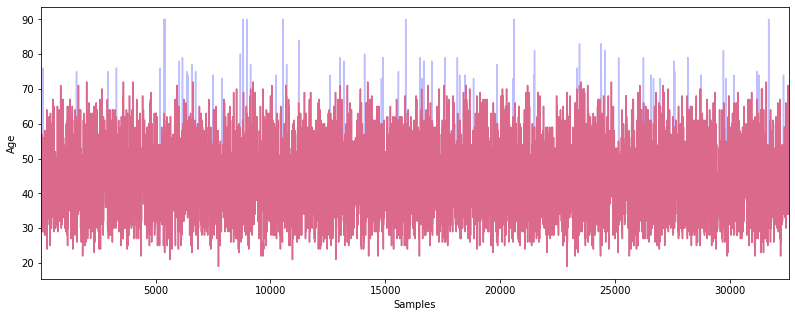

In [41]:
plt.figure(figsize=(13.4,5))

df.age[(df.income == '>50K\n')].plot(alpha=.25, color='blue')
df2.age[(df2.income == '>50K\n')].plot(alpha=.45,color='red')

plt.ylabel('Age')
plt.xlabel('Samples')

Let's see what is happening near the mode:

In [42]:
import numpy as np

countx,divisionx = np.histogram(ml2_age, normed=True) 
county,divisiony = np.histogram(fm2_age, normed=True)

/home/sitthichok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/sitthichok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  after removing the cwd from sys.path.


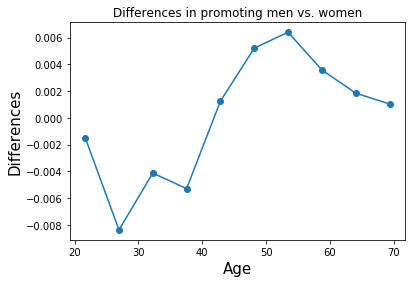

In [43]:
import matplotlib.pyplot as plt

val = [(divisionx[i]+divisionx[i+1])/2 for i in range(len(divisionx)-1)]
plt.plot(val, countx-county, 'o-') 
plt.title('Differences in promoting men vs. women')
plt.xlabel('Age',fontsize=15)
plt.ylabel('Differences',fontsize=15)
plt.show()

There is still some evidence for our hypothesis!

In [44]:
print("Remember:\n We have the following mean values for men, women and the difference:\nOriginally: ", ml_age.mean(), fm_age.mean(),  ml_age.mean()- fm_age.mean()) # The difference between the mean values of male and female populations.
print("For high-income: ", ml1_age.mean(), fm1_age.mean(), ml1_age.mean()- fm1_age.mean()) # The difference between the mean values of male and female populations.
print("After cleaning: ", ml2_age.mean(), fm2_age.mean(), ml2_age.mean()- fm2_age.mean()) # The difference between the mean values of male and female populations.

print("\nThe same for the median:")
print(ml_age.median(), fm_age.median(), ml_age.median()- fm_age.median()) # The difference between the mean values of male and female populations.
print(ml1_age.median(), fm1_age.median(), ml1_age.median()- fm1_age.median()) # The difference between the mean values of male and female populations.
print(ml2_age.median(), fm2_age.median(), ml2_age.median()- fm2_age.median(), end=' ') # The difference between the mean values of male and female populations.

Remember:
 We have the following mean values for men, women and the difference:
Originally:  39.43354749885268 36.85823043357163 2.5753170652810553
For high-income:  44.62578805163614 42.125530110262936 2.5002579413732064
After cleaning:  44.317982123920615 41.877028181041844 2.440953942878771

The same for the median:
38.0 35.0 3.0
44.0 41.0 3.0
44.0 41.0 3.0 

### 2.5 Measuring asymmetry (optional).

**Skewness** is a statistic that measures the asymmetry of set of $n$ data samples $x_i$:

$$ g_1 = \frac{\frac{1}{n} \sum_i (x_i - \mu)^2 }{\frac{1}{n} \sum_i (x_i - \mu)^3 }$$

The numerator is the mean squared deviation (or variance) and the denominator the mean cubed deviation.

Negative deviation indicates that the distribution "skews left" (it extends farther to the left than to the right).

**Skewness** can be affected by outliers!!! A simpler alternative is to look at the relationship between mean ($\mu$) and median ($\mu_{\frac{1}{2}}$). 

In [46]:
def skewness(x):
    res=0
    m=x.mean()
    s=x.std()
    for i in x:
        res+=(i-m)*(i-m)*(i-m)
    res/=(len(x)*s*s*s)
    return res

print("The skewness of the male population is:", skewness(ml2_age))
print("The skewness of the female population is:", skewness(fm2_age))

The skewness of the male population is: 0.26644438384328223
The skewness of the female population is: 0.3863335249128606


**2.6 Pearson's median skewness coefficient** is a more robust alternative:

$$ g_p = \frac{3(\mu - \mu_{\frac{1}{2}})}{\sigma} $$

**Exercise**: Write a function to compute $g_1$ and $g_p$ of the pregnancy length.

In [47]:
def pearson(x):
    return 3*(x.mean()-x.median())/x.std()

print("The Pearson's coefficient of the male population is:", pearson(ml2_age))
print("The Pearson's coefficient of the female population is:", pearson(fm2_age))

The Pearson's coefficient of the male population is: 0.09520660549016392
The Pearson's coefficient of the female population is: 0.2621531209596967


## 2.6 Relative Risk

Let's say that a person is "early" promoted if he/she is promoted before the age of 41, "on time" if he/she is promoted of age 41, 42, 43 or 44, and "late" promoted if he/she is ascended to get income bigger than 50K after being 44 years old. Let us compute the probability of being early, on time and late promoted for men and women:

In [48]:
#ml1 = df[(df.sex == 'Male')&(df.income=='>50K\n')]

ml2 = ml1.drop(ml1.index[(ml1['age'] > df['age'].median() + 35) & (ml1['age'] > df['age'].median() - 15)])
fm2 = fm1.drop(fm1.index[(fm1['age'] > df['age'].median() + 35) & (fm1['age'] > df['age'].median() - 15)])

print(ml2.shape, fm2.shape)


(6601, 15) (1171, 15)


In [49]:
print("Men grouped in 3 categories:")
print("Young:",int(round(100*len(ml2_age[ml2_age<41])/float(len(ml2_age.index)))),"%.")
print("Elder:", int(round(100*len(ml2_age[ml2_age >44])/float(len(ml2_age.index)))),"%.")
print("Average age:", int(round(100*len(ml2_age[(ml2_age>40) & (ml2_age< 45)])/float(len(ml2_age.index)))),"%.")

Men grouped in 3 categories:
Young: 38 %.
Elder: 48 %.
Average age: 14 %.


In [50]:
print("Women grouped in 3 categories:")
print("Young:",int(round(100*len(fm2_age[fm2_age <41])/float(len(fm2_age.index)))),"%.")
print("Elder:", int(round(100*len(fm2_age[fm2_age >44])/float(len(fm2_age.index)))),"%.")
print("Average age:", int(round(100*len(fm2_age[(fm2_age>40) & (fm2_age< 45)])/float(len(fm2_age.index)))),"%.")


Women grouped in 3 categories:
Young: 48 %.
Elder: 37 %.
Average age: 15 %.


The **relative risk** is the ratio of two probabilities. In order to get the relative risk \cite{Downey} of early promotion, we need to consider the  fraction of both probabilities.

In [51]:
print("The male mean:", ml2_age.mean())
print("The female mean:", fm2_age.mean())


The male mean: 44.317982123920615
The female mean: 41.877028181041844


In [52]:
ml2_young = len(ml2_age[(ml2_age<41)])/float(len(ml2_age.index))
fm2_young  = len(fm2_age[(fm2_age<41)])/float(len(fm2_age.index))
print("The relative risk of female early promotion is: ", 100*(1-ml2_young/fm2_young))

The relative risk of female early promotion is:  21.125440082163816


That means that women are 21% more likely to get high gains before 41 years than men.

In [53]:
ml2_elder = len(ml2_age[(ml2_age>44)])/float(len(ml2_age.index))
fm2_elder  = len(fm2_age[(fm2_age>44)])/float(len(fm2_age.index))
print("The relative risk of male late promotion is: ", 100*ml2_elder/fm2_elder)

The relative risk of male late promotion is:  128.9715708971242


That means that men are 29% more likely to get high gains after 44 years than women.

### Discussions.

After exploring the data, we obtained some apparent effects that seem to support our first assumption:

+ **Data description:** The mean age for ascending male professionals is 44 years old while for female professionals it is 41 years.

+ **Relative risk:** Female professionals are 21%  more likely to be ascended before 41 years of age, while men are 29% more likely to be ascended being at least 45 years old.


## 3.4 Continous distributions

So far, we have built **empirical distributions** (which represent the distributions of values in a sample), based on observations, but many real problems are well approximated by fitting **continous distributions functions (CDF)**. 

They are called in this way because the distribution is described by an analytical continous function.

### 3.4.1 The exponential distribution

The CDF of the exponential distribution is:

$$ CDF(x) = 1 -  \exp^{- \lambda x}$$ 

And its PDF is:

$$ PDF(x) = \lambda \exp^{- \lambda x}$$

The parameter $\lambda$ determines the shape of the distribution, the mean of the distribution is $1/\lambda$ and its variance is $1/\lambda^2$. The median is $ln(2)/\lambda$.

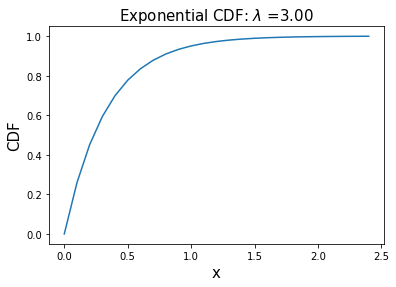

In [54]:
l = 3
x=np.arange(0,2.5,0.1)
y= 1 - np.exp(-l*x)
plt.plot(x,y,'-')
plt.title('Exponential CDF: $\lambda$ =%.2f' % l ,fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('CDF',fontsize=15)
plt.show()

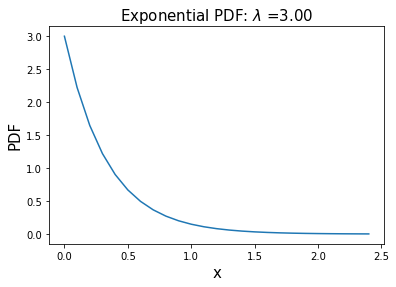

In [57]:
import scipy.stats as stats

l = 3
x=np.arange(0,2.5,0.1)
y= l * np.exp(-l*x)
plt.plot(x,y,'-')
plt.title('Exponential PDF: $\lambda$ =%.2f' % l, fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.show()

There are a lot of real world events that can be described with this distribution.
* The time until a radioactive particle decays,
* The time it takes before your next telephone call,
* The time until default (on payment to company debt holders) in reduced form credit risk modeling.

The random variable $X$ of the lifelengths of some batteries is associated with a probability density function of the form:

$$ PDF(x) = \frac{1}{4} \exp^{- \frac{x}{4}}$$ 

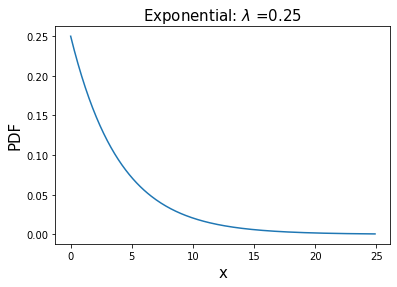

In [58]:
l = 0.25
x=np.arange(0,25,0.1)
y= l * np.exp(-l*x)
plt.plot(x,y,'-')
plt.title('Exponential: $\lambda$ =%.2f' % l ,fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('PDF',fontsize=15)
plt.show()

### 3.4.2 The normal distribution

The **normal, or Gaussian distribution** is the most used one because it describes a lot of phenomena and because it is amenable for analysis. 

Its CDF has no closed-form expression and its more common representation is the PDF:

$$ PDF(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left(-\frac{(x-\mu)^2}{2 \sigma^2} \right)$$


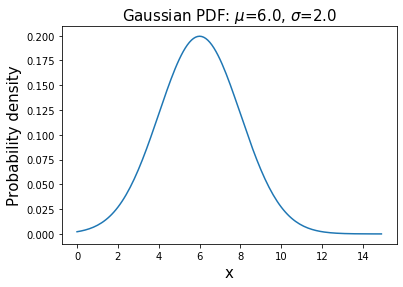

In [59]:
u=6 # mean
s=2 # standard deviation
x=np.arange(0,15,0.1)
y=(1/(np.sqrt(2*np.pi*s*s)))*np.exp(-(((x-u)**2)/(2*s*s)))
plt.plot(x,y,'-')
plt.title('Gaussian PDF: $\mu$=%.1f, $\sigma$=%.1f' % (u,s),fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('Probability density',fontsize=15)
plt.show()

Examples:
    * Measures of size of living tissue (length, height, skin area, weight);
    * The length of inert appendages (hair, claws, nails, teeth) of biological specimens, in the direction of growth; presumably the thickness of tree bark also falls under this category;
    * Certain physiological measurements, such as blood pressure of adult humans.


### 3.5 Central Limit Theorem

The normal distribution is also important, because it is involved in the Central Limit Theorem:

> Take the mean of $n$ random samples from ANY arbitrary distribution with a $well$ $defined$ standard deviation $\sigma$ and mean $\mu$. As $n$ gets bigger the **distribution of the sample mean** will always converge to a Gaussian (normal) distribution with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$.

Colloquially speaking, the theorem states the distribution of an average tends to be normal, even when the distribution from which the average is computed is decidedly non-normal. This explains the ubiquity of the Gaussian distribution in science and statistics. 

#### Example: Uniform Distribution

The uniform distribution is obviously non-normal.  Let's call it the $parent$ $distribution$.

To compute an average, two samples are drawn ($n=2$), at random, from the parent distribution and averaged. Then another sample of two is drawn and another value of the average computed.  This process is repeated, over and over, and averages of two are computed.  

Repeatedly taking more elements ($n = 3,4...$) from the parent distribution, and computing the averages, produces a normal probability density.

/home/sitthichok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


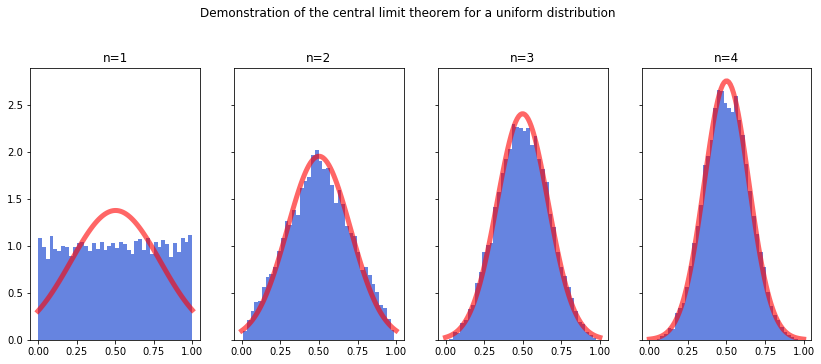

In [60]:
fig, ax = plt.subplots(1, 4, sharey=True, squeeze=True, figsize=(14, 5))
x = np.linspace(0, 1, 100)
for i in range(4):
    f = np.mean(np.random.random((10000, i+1)), 1)
    m, s = np.mean(f), np.std(f, ddof=1)
    fn = (1/(s*np.sqrt(2*np.pi)))*np.exp(-(x-m)**2/(2*s**2))  # normal pdf            
    ax[i].hist(f, 40, normed=True, color=[0, 0.2, .8, .6]) 
    ax[i].set_title('n=%d' %(i+1))
    ax[i].plot(x, fn, color=[1, 0, 0, .6], linewidth=5)
plt.suptitle('Demonstration of the central limit theorem for a uniform distribution', y=1.05)
plt.show()

## 3.6 Kernel density estimates

In some instances, we may not be interested in the parameters of a particular distribution of data, but just a **continous representation** of the data at hand. In this case, we can estimate the distribution non-parametrically (i.e. making no assumptions about the form of the underlying distribution) using kernel density estimation.

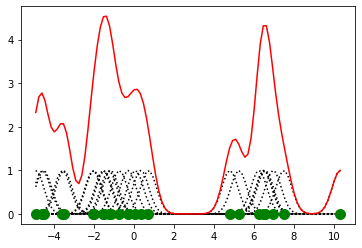

In [61]:
from scipy.stats.distributions import norm

# Some random data
y = np.random.random(15) * 10
x = np.linspace(0, 10, 100)

x1 = np.random.normal(-1, 2, 15) # parameters: (loc=0.0, scale=1.0, size=None)
x2 = np.random.normal(6, 3, 10)
y = np.r_[x1, x2] # r_ Translates slice objects to concatenation along the first axis.
x = np.linspace(min(y), max(y), 100)


# Smoothing parameter
s = 0.4

# Calculate the kernels
kernels = np.transpose([norm.pdf(x, yi, s) for yi in y])

plt.plot(x, kernels, 'k:')
plt.plot(x, kernels.sum(1), 'r')
plt.plot(y, np.zeros(len(y)), 'go', ms=10)

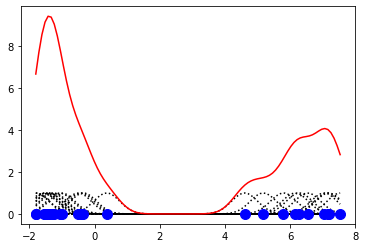

In [62]:
from scipy.stats import kde

x1 = np.random.normal(-1, 0.5, 15) # parameters: (loc=0.0, scale=1.0, size=None)
x2 = np.random.normal(6, 1, 10)
y = np.r_[x1, x2] # r_ Translates slice objects to concatenation along the first axis.
x = np.linspace(min(y), max(y), 100)

s = 0.4 # Smoothing parameter

kernels = np.transpose([norm.pdf(x, yi, s) for yi in y]) # Calculate the kernels
density = kde.gaussian_kde(y)

plt.plot(x, kernels, 'k:')
plt.plot(x, kernels.sum(1), 'r')
plt.plot(y, np.zeros(len(y)), 'bo', ms=10)

/home/sitthichok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


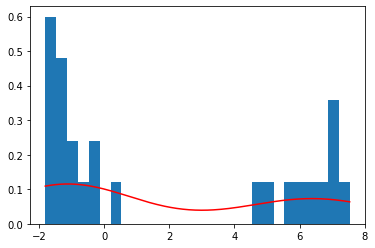

In [63]:
xgrid = np.linspace(x.min(), x.max(), 200)
plt.hist(y, bins=28, normed=True)
plt.plot(xgrid, density(xgrid), 'r-')

SciPy implements a Gaussian KDE that automatically chooses an appropriate bandwidth. Let's create a bi-modal distribution of data that is not easily summarized by a parametric distribution:

In [64]:
# Create a bi-modal distribution with a mixture of Normals.
x1 = np.random.normal(-1, 2, 15) # parameters: (loc=0.0, scale=1.0, size=None)
x2 = np.random.normal(6, 3, 10)

# Append by row
x = np.r_[x1, x2] # r_ Translates slice objects to concatenation along the first axis.


/home/sitthichok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


(array([0.16036149, 0.10690766, 0.16036149, 0.05345383, 0.16036149,
        0.05345383, 0.21381532, 0.10690766, 0.        , 0.        ,
        0.        , 0.        , 0.05345383, 0.05345383, 0.05345383,
        0.        , 0.10690766, 0.05345383]),
 array([-3.44106666, -2.69275732, -1.94444799, -1.19613865, -0.44782932,
         0.30048002,  1.04878936,  1.79709869,  2.54540803,  3.29371736,
         4.0420267 ,  4.79033603,  5.53864537,  6.2869547 ,  7.03526404,
         7.78357337,  8.53188271,  9.28019204, 10.02850138]),
 <a list of 18 Patch objects>)

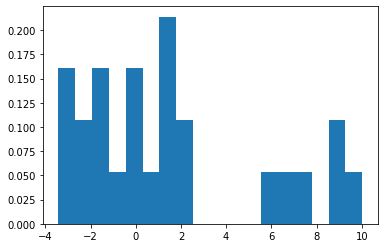

In [65]:
plt.hist(x, bins=18, normed=True)

/home/sitthichok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


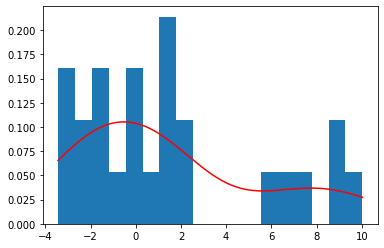

In [66]:
density = kde.gaussian_kde(x)
xgrid = np.linspace(x.min(), x.max(), 200)
plt.hist(x, bins=18, normed=True)
plt.plot(xgrid, density(xgrid), 'r-')

<font color='black'>
## 4 Estimation


<font\> 


/home/sitthichok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


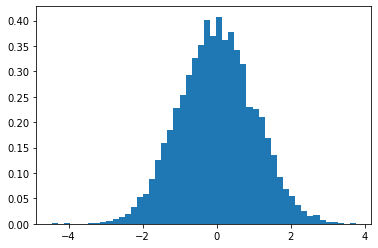

In [67]:
x = np.random.normal(0.0, 1.0, 10000)
a = plt.hist(x,50,normed='True')


**Definition:** *Estimation* is the process of inferring the parameters (e.g. mean) of a distribution from a statistic of samples drown from a population.

For example: What is the estimated mean $\hat{\mu}$ of the following normal data?

We can use our definition of empirical mean:

In [68]:
print('The empirical mean of the sample is ', x.mean())

The empirical mean of the sample is  0.008406895592074463


### 4.1 Sample mean

+ The process is called **estimation** and the statistic we used **estimator**.

+ The median is also an estimator (more robust to outliers). 

+ "Is median better than sample mean?" is a question with at least two different answers. We can use two different objectives to answer this question: the minimization of error or the maximization to get the right answer. 

+ If there are no outliers, we can use the **sample mean** to minimize **mean squared error** (where $m$ is the number of times you play the estimation game, not the size of the sample!):

$$ MSE = \frac{1}{m} \sum(\hat{\mu} - \mu)^2$$




In [69]:
NTs=200
mu=0.0
var=1.0
err = 0.0
NPs=1000
for i in range(NTs):
    x = np.random.normal(mu, var, NPs)
    err += (x.mean()-mu)**2

print('MSE: ', err/NTs)

MSE:  0.001005177709377845


### 4.2 Variance

We can also estimate the variance with:

$$ \hat{\sigma}^2 = \frac{1}{n} \sum_i (x_i - \mu)^2 $$

This estimator works for large samples, but it is biased for small samples. We can use this one:

$$ \hat{\sigma}^2_{n-1} = \frac{1}{n-1} \sum_i (x_i - \mu)^2 $$


### 4.3 Other concepts: Standard scores

$$ z_i = \frac{x_i - \mu}{\sigma}$$

This measure is dimensionless and its distribution has mean 0 and variance 1.

It inherits the "shape" of $X$: if it is normally distributed, so is $Z$. If $X$ is skewed, so is $Z$.

### 4.4 Covariance

**Covariance** is a measure of the tendency of two variables to vary together. 

If we have two series $X$ and $Y$ with $X=\{x_i\}$ and $Y=\{y_i\}$, and they vary together, their deviations $x_i - \mu_X$ and $y_i - \mu_Y$ tend to have the same sign.

If we multiply them together, the product is positive, when the deviations have the same sign, and negative, when they have the opposite sign. So adding up the products gives a measure of the tendency to vary together.

Covariance is the mean of the products:

$$ Cov(X,Y) = \frac{1}{n} \sum_{i=1}^n (x_i - \mu_X)*(y_i - \mu_Y), $$

where $n$ is the length of the two series.

It is a measure that is difficult to interpret.

In [70]:
def Cov(X, Y):
    def _get_dvis(V):
        return [v - np.mean(V) for v in V]
    dxis = _get_dvis(X)
    dyis = _get_dvis(Y)
    return np.sum([x * y for x, y in zip(dxis, dyis)])/len(X)


X = [5, -1, 3.3, 2.7, 12.2]
X= np.array(X)
Y = [10, 12, 8, 9, 11]

print("Cov(X, X) = %.2f" % Cov(X, X))
print("Var(X) = %.2f" % np.var(X))

print("Cov(X, Y) = %.2f" % Cov(X, Y))

Cov(X, X) = 18.89
Var(X) = 18.89
Cov(X, Y) = 0.18


Let us create some examples of positive and negative correlations like those showing the relations of stock market with respect to the economic growth or the gasoline prices with respect to the world oil production:

In [71]:
MAXN=100

MAXN=40
X=np.array([[1,9],[3, 2], [5,3],[5.5,4],[6,4],[6.5,4],[7,3.5],[7.5,3.8],[8,4],
            [8.5,4],[9,4.5],[9.5,7],[10,9],[10.5,11],[11,11.5],[11.5,12],[12,12],[12.5,12],[13,10]])



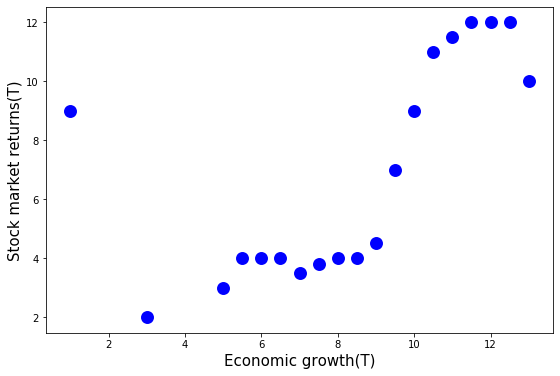

In [72]:
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],color='b',s=120, linewidths=2,zorder=10)
plt.xlabel('Economic growth(T)',fontsize=15)
plt.ylabel('Stock market returns(T)',fontsize=15)
plt.gcf().set_size_inches((20,6))

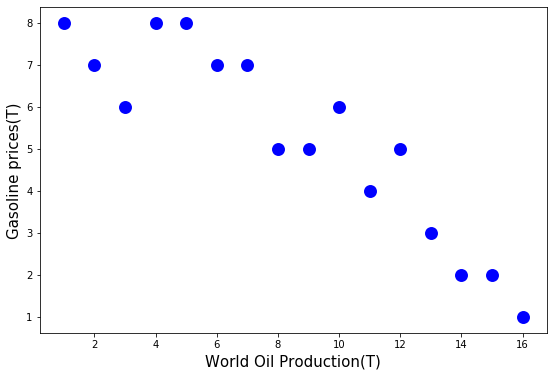

In [73]:
X=np.array([[1,8],[2, 7], [3,6],[4,8],[5,8],[6,7],[7,7],[8,5],[9,5],[10,6],[11,4],[12,5],[13,3],[14,2],[15,2],[16,1]])
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],color='b',s=120, linewidths=2,zorder=10)
plt.xlabel('World Oil Production(T)',fontsize=15)
plt.ylabel('Gasoline prices(T)',fontsize=15)
plt.gcf().set_size_inches((20,6))

### 4.5 Pearson's Correlation

Shell we take into account the variance? An alternative is to divide the deviations by $\sigma$, which yields standard scores, and compute the product of standard scores:

$$ p_i = \frac{(x_i - \mu_X)}{\sigma_X} \frac{(y_i - \mu_Y)}{\sigma_Y} $$
 
The mean of these products is:

$$ \rho = \frac{1}{n} \sum p_i = \frac{1}{n} \sum  \frac{(x_i - \mu_X)}{\sigma_X} \frac{(y_i - \mu_Y)}{\sigma_Y}  $$

Or we can rewrite $\rho$ by factoring out $\sigma_X$ and $\sigma_Y$:

$$ \rho = \frac{Cov(X,Y)}{\sigma_X \sigma_Y}$$

 


In [74]:
def Corr(X, Y):
    assert len(X) == len(Y)
    return Cov(X, Y) / np.prod([np.std(V) for V in [X, Y]])

print("Corr(X, X) = %.5f" % Corr(X, X))

Y=np.random.random(len(X))

print("Corr(X, Y) = %.5f" % Corr(X, Y))

Corr(X, X) = 2.00000
Corr(X, Y) = 0.05958


When $\rho = 0$, we cannot say that there is no relationship between the variables!

Pearson's coefficient only measures **linear** correlations!

### 4.6 Spearman’s rank correlation

Pearson’s correlation works well if the relationship between variables is linear and if the variables are roughly normal. But it is not robust in the presence of **outliers**.

Spearman’s rank correlation is an alternative that mitigates the effect of outliers and skewed distributions. To compute Spearman’s correlation, we have to compute the rank of each value, which is its index in the sorted sample. 

For example, in the sample {7, 1, 2, 5} the rank of the value 5 is 3, because it appears third if we sort the elements. 

Then, we compute the Pearson’s correlation, **but for the ranks**.

ranks:  [4.0, 1.0, 2.0, 3.0]
Pearson rank coefficient: 0.28
[1.0, 2.0, 3.0, 4.0, 5.0]
[2.0, 1.0, 3.0, 5.0, 4.0]
Spearman rank coefficient: 0.80


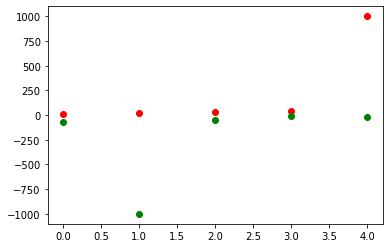

In [75]:
def list2rank(l):
    #l is a list of numbers
    # returns a list of 1-based index; mean when multiple instances
    return [np.mean([i+1 for i, sorted_el in enumerate(sorted(l)) if sorted_el == el]) for el in l]

l = [7, 1, 2, 5]
print("ranks: ", list2rank(l))

def spearmanRank(X, Y):
    # X and Y are same-length lists
    print(list2rank(X)) 
    print(list2rank(Y))
    return Corr(list2rank(X), list2rank(Y))

X = [10, 20, 30, 40, 1000]
Y = [-70, -1000, -50, -10, -20]
plt.plot(X,'ro')
plt.plot(Y,'go')

print("Pearson rank coefficient: %.2f" % Corr(X, Y))
print("Spearman rank coefficient: %.2f" % spearmanRank(X, Y))



**Exercise:** Obtain for the Anscombe's quartet [2] given in the figures bellow, the different estimators (mean, variance, covariance for each pair, Pearson's correlation and Spearman's rank correlation.

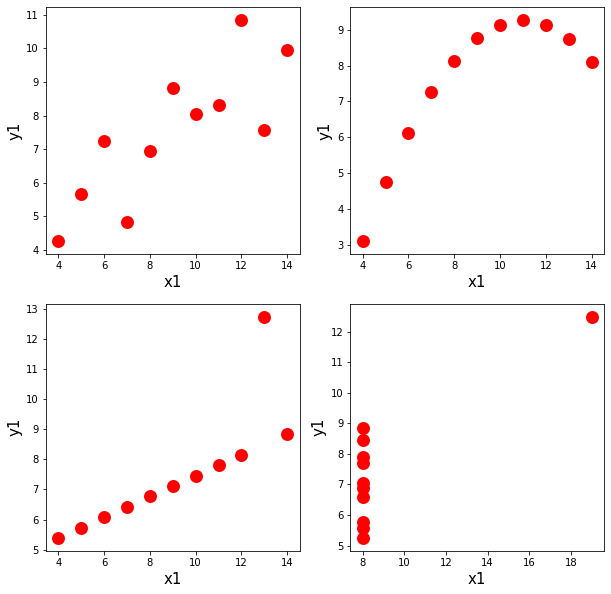

In [76]:
X=np.array([[10.0, 8.04, 10.0, 9.14, 10.0, 7.46, 8.0, 6.58],
[8.0, 6.95, 8.0, 8.14, 8.0, 6.77, 8.0, 5.76],
[13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71],
[9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84],
[11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47],
[14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04],
[6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25],
[4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50],
[12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56],
[7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91],
[5.0,5.68,5.0,4.74,5.0,5.73,8.0,6.89]])


plt.subplot(2,2,1)
plt.scatter(X[:,0],X[:,1],color='r',s=120, linewidths=2,zorder=10)
plt.xlabel('x1',fontsize=15)
plt.ylabel('y1',fontsize=15)

plt.subplot(2,2,2)
plt.scatter(X[:,2],X[:,3],color='r',s=120, linewidths=2,zorder=10)
plt.xlabel('x1',fontsize=15)
plt.ylabel('y1',fontsize=15)

plt.subplot(2,2,3)
plt.scatter(X[:,4],X[:,5],color='r',s=120, linewidths=2,zorder=10)
plt.xlabel('x1',fontsize=15)
plt.ylabel('y1',fontsize=15)

plt.subplot(2,2,4)
plt.scatter(X[:,6],X[:,7],color='r',s=120, linewidths=2,zorder=10)
plt.xlabel('x1',fontsize=15)
plt.ylabel('y1',fontsize=15)
plt.gcf().set_size_inches((10,10))

### 5. Main reference
[1] *Think Stats: Probability and Statistics for Programmers*, by Allen B. Downey, published by O'Reilly Media.
http://www.greenteapress.com/thinkstats/

[2] Anscombe's quartet, https://en.wikipedia.org/wiki/Anscombe%27s_quartet